In [2]:
model_path = "meta-llama/Llama-3.2-3B-Instruct"
dataset_type = "valuenet"
concept_direction_type = "pos2neg"
norm_type = "base"
prompt_type = "bare"
model_name = model_path.split("/")[1].lower()

matrix_rank_results_dir = (
    "/home/itai/research/PersonalValuesGeometry/experiments_results/matrix_rank"
)
values_list_str: list[str] = [
    line.strip()
    for line in open("/home/itai/research/PersonalValuesGeometry/datasets/values.txt")
]

target_layers = [i+1 for i in range(28)]

In [3]:
from collections import defaultdict

import pandas as pd

epsilons = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]

In [19]:
rank_per_value = defaultdict(list) # Key: 価値観, Value: epsilonのランク．層順にランクを格納．
for value in values_list_str:
    rank_per_epsilon = defaultdict(list)
    for target_layer in target_layers:
        save_path_struicture = f"{model_name}/embeddings/layer{target_layer}/{dataset_type}/{concept_direction_type}/{norm_type}/{prompt_type}"
        concept_rank_results_path = (
            f"{matrix_rank_results_dir}/{save_path_struicture}/{value}.csv"
        )
        # print(f"{concept_rank_results_path=}")
        tmp_df = pd.read_csv(concept_rank_results_path, header=None)
        for i in range(len(tmp_df)):
            rank = tmp_df.iloc[[i], [1]].values[0][0]
            rank_per_epsilon[i].append(rank)
        rank_per_value[value] = rank_per_epsilon

epsilon: 0.001


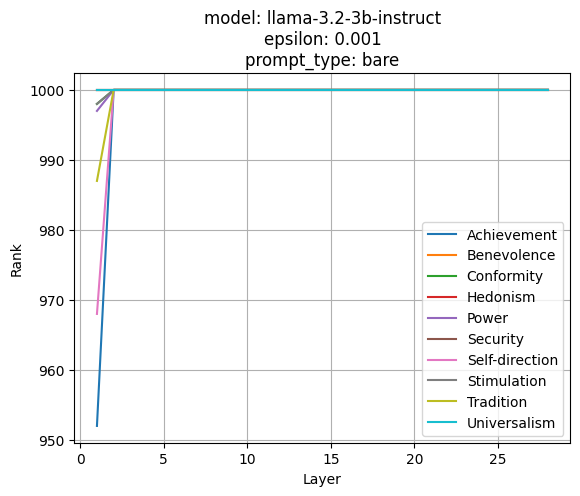

epsilon: 0.0001


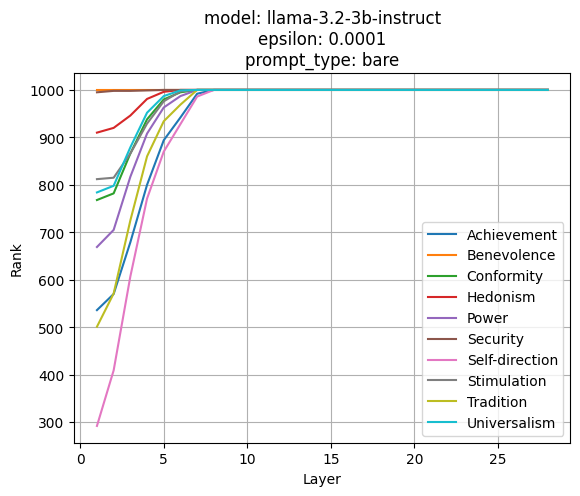

epsilon: 1e-05


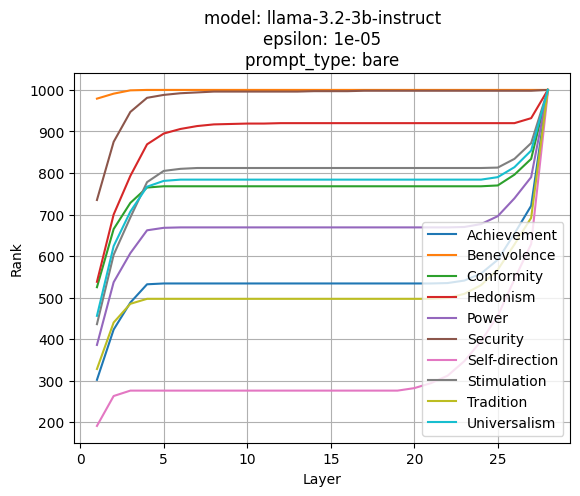

epsilon: 1e-06


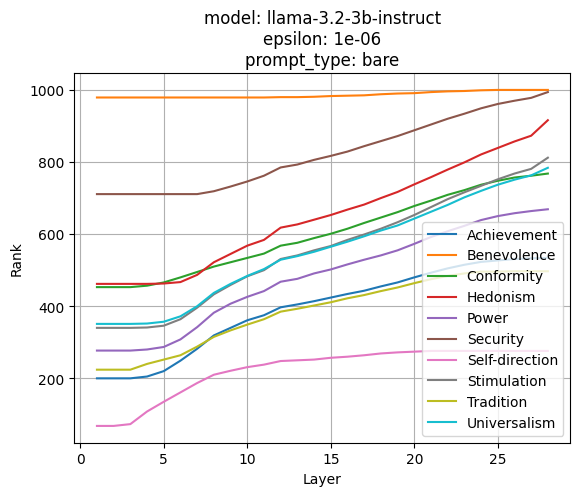

epsilon: 1e-07


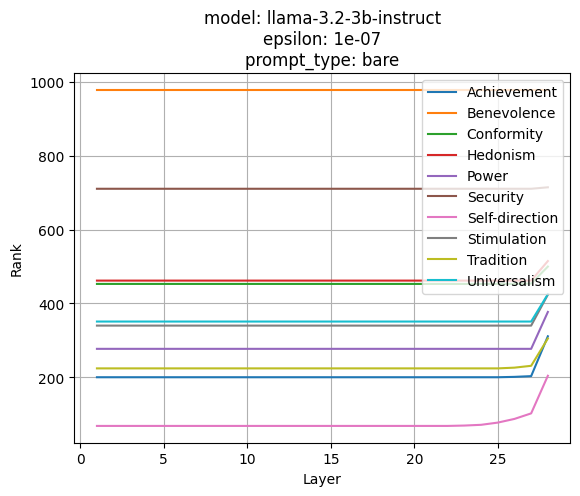

epsilon: 1e-08


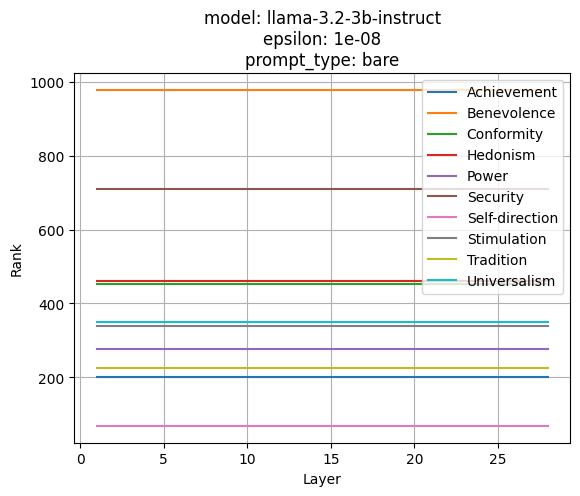

In [106]:
import matplotlib.pyplot as plt

for i, epsilon in enumerate(epsilons):
    print(f"epsilon: {epsilon}")
    plt.figure()
    plt.title(f"model: {model_name}\nepsilon: {epsilon}\nprompt_type: {prompt_type}")
    for value in values_list_str:
        rank_dist_per_layer = rank_per_value[value][i]
        plt.plot(target_layers, rank_dist_per_layer, label=f"{value}")
        plt.legend()
        plt.grid(True)
        plt.xlabel("Layer")
        plt.ylabel("Rank")
    plt.show()


# LOO

In [12]:
results_path = "/home/itai/research/PersonalValuesGeometry/figures/llama-3.2-3b-instruct/embeddings/layer28/valuenet/pos2neg/base/bare/concept_direction_LOO.png"
prompt_types = ["bare", "explicit", "topic"]
for prompt_type in prompt_types:
    with open(f"/home/itai/research/PersonalValuesGeometry/figures/llama-3.2-3b-instruct/embeddings/{prompt_type}.md", "w") as f:
        for i in range(28):
            layer = i + 1
            path = f"/home/itai/research/PersonalValuesGeometry/figures/llama-3.2-3b-instruct/embeddings/layer{layer}/valuenet/pos2neg/base/{prompt_type}/concept_direction_LOO.png"
            md_content = f"![Layer{layer}]({path})"
            html_content = f'### Layer {layer} <figure><img src="{path}" alt="Layer{layer}" width="400" /></figure>\n\n'
            f.write(html_content)

In [16]:
import markdown
import pdfkit

for prompt_type in prompt_types:
    md_file_path = f"/home/itai/research/PersonalValuesGeometry/figures/llama-3.2-3b-instruct/embeddings/{prompt_type}.md"
    pdf_file_path = f"/home/itai/research/PersonalValuesGeometry/figures/llama-3.2-3b-instruct/embeddings/{prompt_type}.pdf"
    with open(md_file_path, "r", encoding="utf-8") as f:
        md_content = f.read()
    html_content = markdown.markdown(md_content, output_format="html5")
    pdfkit.from_string(html_content, pdf_file_path)

which: no wkhtmltopdf in (/home/itai/research/PersonalValuesGeometry/.venv/bin:/home/itai/.cursor-server/cli/servers/Stable-906121b8c0bdf041c14a15dac228e66ab5505260/server/bin/remote-cli:/home/itai/.local/bin:/home/itai/.pyenv/shims:/home/itai/.pyenv/bin:/usr/local/sbin:/usr/local/bin:/usr/bin:/opt/cuda/bin:/opt/cuda/nsight_compute:/opt/cuda/nsight_systems/bin:/usr/bin/site_perl:/usr/bin/vendor_perl:/usr/bin/core_perl)


OSError: No wkhtmltopdf executable found: "b''"
If this file exists please check that this process can read it or you can pass path to it manually in method call, check README. Otherwise please install wkhtmltopdf - https://github.com/JazzCore/python-pdfkit/wiki/Installing-wkhtmltopdf